This notebook makes a plot of all variables in the train dataset and also produces a heatmap of correlations between the numeric variables in the data. All output saved to specific folders within the working directory. 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/train.csv")

In [7]:
catVars = [col for col in list(train) if train[col].dtype=="object"]
catDf = train[catVars]
catPng = [col + ".png" for col in catVars]

In [ ]:
for i, col in enumerate(catDf.columns):
    plt.figure(i)
    sns.countplot(x=col, data=catDf)
    plt.savefig("catPlots/" + col + ".png")

In [29]:
histVars = [col for col in list(train) if train[col].dtype!="object"]
histDf = train[histVars[1:len(histVars)]]
histDf.dropna(inplace=True)

In [ ]:
for i, col in enumerate(histDf.columns):
    plt.figure(i)
    sns.distplot(histDf[col])
    plt.savefig("histograms/" + col + ".png")

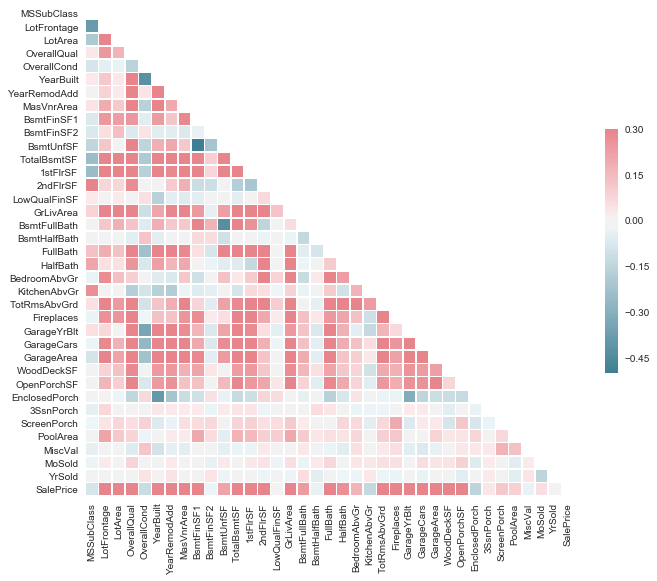

In [34]:
## Correlation Heat Map (I didn't write this code, blugh)
sns.set(style="white")

# Compute the correlation matrix
corr = histDf.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})